In [1]:
import random
import pickle
import itertools
import timeit
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = 1.25*np.array(mpl.rcParams['figure.figsize'])

 - https://stackoverflow.com/questions/54050322/random-sample-of-n-distinct-permutations-of-a-list/54050440#54050440
 - https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.permutation.html
 - https://docs.python.org/3.7/library/itertools.html#itertools.permutations

In [3]:
k = 50
n = 500

mylist = list(range(0, k))

In [4]:
mylist = np.array(mylist)
perms = set()
for i in range(n):
    while True:
        perm = np.random.permutation(k)
        key = tuple(perm)
        if key not in perms:
            perms.update(key)
            break
    #print(i, mylist[perm])

In [5]:
def perm_generator(seq):
    seen = set()
    length = len(seq)
    while True:
        perm = tuple(random.sample(list(seq), length))
        if perm not in seen:
            seen.add(perm)
            yield perm

In [6]:
def get_perms(seq, N=10):
    rand_perms = perm_generator(mylist)
    return [next(rand_perms) for _ in range(N)]

In [7]:
nr = 3
ns = 6

In [8]:
ks = np.arange(100, 1001, 50)
Ns = np.arange(250, 5001, 250)

t = np.empty((ks.size, Ns.size))
for (i, k) in enumerate(ks):
    for (j, N) in enumerate(Ns):
        t[i,j] = np.mean(timeit.Timer("get_perms(%s, N=%d)" % (list(range(k)), N), setup="from __main__ import get_perms").repeat(nr, number=ns))

with open('Operms4.pickle', 'wb') as fh:
    pickle.dump(t, fh)

In [9]:
with open('Operms4.pickle', 'rb') as fh:
    t = pickle.load(fh)

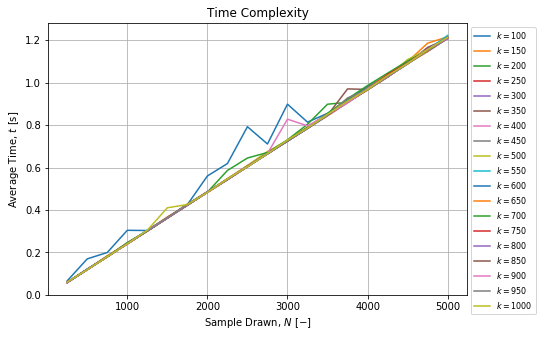

In [16]:
fig, axe = plt.subplots()
axe.plot(Ns,t.T)
axe.set_title("Time Complexity")
axe.set_xlabel(r"Sample Drawn, $N$ $[-]$")
axe.set_ylabel(r"Average Time, $t$ $[\mathrm{s}]$")
lgd = axe.legend([r"$k=%d$" % k for k in ks], bbox_to_anchor=(1,1), loc='upper left', fontsize=8)
axe.grid(which='both')
fig.savefig('OpermN.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')

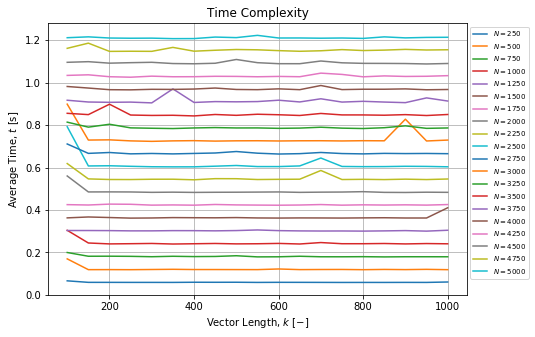

In [17]:
fig, axe = plt.subplots()
axe.plot(ks,t)
axe.set_title("Time Complexity")
axe.set_xlabel(r"Vector Length, $k$ $[-]$")
axe.set_ylabel(r"Average Time, $t$ $[\mathrm{s}]$")
lgd = axe.legend([r"$N=%d$" % N for N in Ns], bbox_to_anchor=(1,1), loc='upper left', fontsize=7)
axe.grid(which='both')
fig.savefig('Opermk.png', dpi=120, bbox_extra_artists=(lgd,), bbox_inches='tight')